In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
:parameter
--------------------
data: n-array like
[
[1.0 2.3 2.1 0.2]
[0.0 2.4 1.1 0.7]
]
每个元素都是有表示距离的属性的，对于没有距离属性的要抓化成具有距离属性的
"""

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d

dir_name = '/Users/changqingli/data/time_space_cluster/'
feat_file_mini = 'fs_mini'
feat_file_all = 'fs_all'
feat_file_user_shanghai_mini = 'fs_user_shanghai_mini'
feat_file_user_shanghai_all = 'fs_user_shanghai_all'


def key_count(cluster_y):
    m = {}
    for i in cluster_y:
        if i not in m:
            m.setdefault(i, 0)
        m[i] += 1
    res = sorted(m.items(), key=lambda x: x[1], reverse=True)
    return res



In [2]:
f_data = []
user_info = []
with open(dir_name + feat_file_user_shanghai_all, 'r') as f:
    for line in f:
        line = line.strip().split("\t")
        if float(line[-4])<30.40 or float(line[-4])>31.53 or float(line[-3])<120.52 or float(line[-3])>122.12:
            continue
        line.insert(2, line[1][:4])  # _year
        line.insert(2, line[1][5:7])  # _month
        line.insert(2, line[1][8:10])  # _date
        line.insert(2, line[1][11:13])  # _hour
        f_data.append(line[2:-2])  # [_year,_month,_date,_hour,latitude,longitude]
        user_info.append([line[0], line[-2], line[-1]])



In [3]:
f_data[:2]

[['16', '21', '09', '2019', '31.083843', '121.253874'],
 ['19', '21', '09', '2019', '31.080615', '121.361396']]

In [4]:
scale = MinMaxScaler()
scale.fit(f_data)
f_data_transform = scale.transform(f_data)


In [5]:
np.array(f_data, dtype='float')[:2]

array([[  16.      ,   21.      ,    9.      , 2019.      ,   31.083843,
         121.253874],
       [  19.      ,   21.      ,    9.      , 2019.      ,   31.080615,
         121.361396]])

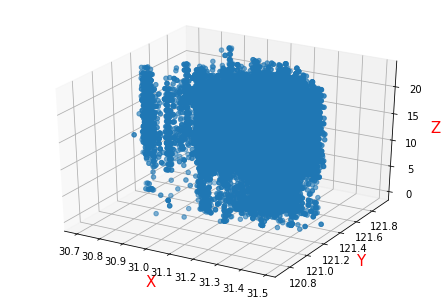

In [6]:
from mpl_toolkits.mplot3d import Axes3D

x = np.array(f_data, dtype='float')[:, 4]
y = np.array(f_data, dtype='float')[:, 5]
z = np.array(f_data, dtype='float')[:, 0]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
 
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})

plt.show()

In [7]:
k_means = KMeans()
k_means.fit(f_data_transform)
cluster_train_counts = key_count(k_means.labels_)
print(cluster_train_counts)



[(0, 45287), (1, 34891), (5, 20869), (3, 12810), (2, 9032), (4, 5310), (7, 4448), (6, 4017)]


In [8]:
test_label = np.reshape(k_means.labels_, [len(k_means.labels_), -1])

print(np.shape(f_data_transform))
print(np.shape(test_label))



(136664, 6)
(136664, 1)


In [9]:
tsne = TSNE()
tsne.fit_transform(test_label)  # 进行数据降维,降成两维


array([[-13.287999 ,   1.9692802],
       [-13.289732 ,   1.9696575],
       [ -3.431647 , -13.226877 ],
       ...,
       [ -2.8261678,  -2.3187714],
       [ -2.826192 ,  -2.3187764],
       [ -2.8262134,  -2.318779 ]], dtype=float32)

In [10]:
cluster_test = np.concatenate((tsne.embedding_, test_label.reshape([len(test_label), 1])), axis=1)
df=pd.DataFrame(cluster_test, columns=['f_0', 'f_1', 'label']) #转换数据格式



In [11]:
df.head()

,f_0,f_1,label
0,-13.287999,1.969280,2.0
1,-13.289732,1.969658,2.0
2,-3.431647,-13.226877,3.0
3,-4.278915,-11.840973,3.0
4,-13.289732,1.969658,2.0


label 0 has 45287 sample
label 1 has 34891 sample
label 2 has 9032 sample
label 3 has 12810 sample
label 4 has 5310 sample
label 5 has 20869 sample
label 6 has 4017 sample
label 7 has 4448 sample


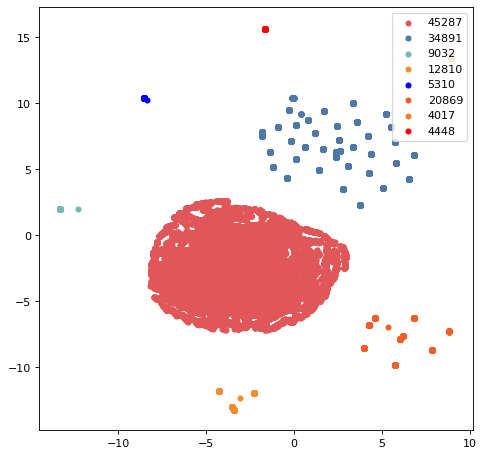

In [12]:

colr = ['#E15759', '#4E79A7', '#76B7B2', '#F28E2B','blue','#F45E2B','#F67E2B', 'r']

plt.figure(figsize=(7, 7), dpi=80)
axes = plt.subplot(111)
types = []
nums = []
for i in range(8):
    d=df[df['label']==i]
    print("label %d has %d sample" % (i, len(d['f_1'].values)))
    type1 = axes.scatter(d['f_0'].values, d['f_1'].values, s=20, c=colr[i])
    types.append(type1)
    nums.append(len(d['f_1'].values))
axes.legend(types, nums, loc=1)

d=df[df['label']==2]


label 0 has 45287 sample
label 1 has 34891 sample
label 2 has 9032 sample
label 3 has 12810 sample
label 4 has 5310 sample
label 5 has 20869 sample


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


label 6 has 4017 sample
label 7 has 4448 sample


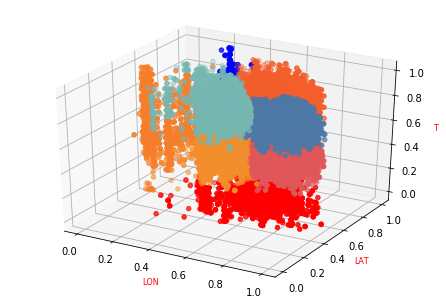

In [13]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

f_data_transform_cluster = np.concatenate((f_data_transform, test_label.reshape([len(test_label), 1])), axis=1)
df1=pd.DataFrame(f_data_transform_cluster, columns=['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'label']) #转换数据格式

colr = ['#E15759', '#4E79A7', '#76B7B2', '#F28E2B','blue','#F45E2B','#F67E2B', 'r']
fig = plt.figure()
ax = Axes3D(fig)
types = []
nums = []
for i in range(8):
    d=df1[df1['label']==i]
    print("label %d has %d sample" % (i, len(d['f_1'].values)))
    type1 = ax.scatter(d['f_4'].values, d['f_5'].values, d['f_0'].values, s=20, c=colr[i])
    types.append(type1)
    nums.append(len(d['f_1'].values))
axes.legend(types, nums, loc=1)

ax.set_zlabel('T', fontdict={'size': 8, 'color': 'red'})
ax.set_ylabel('LAT', fontdict={'size': 8, 'color': 'red'})
ax.set_xlabel('LON', fontdict={'size': 8, 'color': 'red'})
plt.show()
